In [1]:
import os
import sys
import pandas as pd

operating_system = 'mac'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

# Add the path to the custom library
custom_library_path = os.path.abspath('util/processing/')
sys.path.append(custom_library_path)

import extraction_squares

if operating_system == 'curnagl':
    name_of_variable= pd.read_csv('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/curnagl/DATASETS/variable_list_80_mean.csv')
    path_data = '/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/curnagl/DATASETS'
else:
    name_of_variable= pd.read_csv('data/variable_list_80_mean.csv')
    path_data = 'data'

storm_dates = pd.read_csv('pre_processing/tracks/storm_dates.csv')
path_tracks_1h_EU = 'pre_processing/tracks/ALL_TRACKS/tracks_1h_EU'
path_tracks_1h_non_EU = 'pre_processing/tracks/ALL_TRACKS/tracks_1h_non_EU'
dataset = 'datasets_1h_EU'
dataset_non_EU = 'datasets_1h_non_EU'
#name_of_variables, storm_dates, path_data, path_tracks_1h_EU, dataset

In [2]:
X_train, X_test, X_validation, y_train, y_test, y_validation = extraction_squares.X_y_datasets_EU(name_of_variable, storm_dates, path_data, path_tracks_1h_EU, dataset, False)

Storm 59 not found in 10m_u_component_of_wind for level 0
Storm 59 not found in 10m_u_component_of_wind for level 0
Storm 59 not found in 10m_u_component_of_wind for level 0
Storm 59 not found in 10m_u_component_of_wind for level 0
Storm 59 not found in 10m_v_component_of_wind for level 0
Storm 59 not found in 10m_v_component_of_wind for level 0
Storm 59 not found in 10m_v_component_of_wind for level 0
Storm 59 not found in 10m_v_component_of_wind for level 0
Storm 59 not found in 2m_dewpoint_temperature for level 0
Storm 59 not found in 2m_dewpoint_temperature for level 0
Storm 59 not found in 2m_dewpoint_temperature for level 0
Storm 59 not found in 2m_dewpoint_temperature for level 0
Storm 59 not found in 2m_temperature for level 0
Storm 59 not found in 2m_temperature for level 0
Storm 59 not found in 2m_temperature for level 0
Storm 59 not found in 2m_temperature for level 0
Storm 59 not found in convective_available_potential_energy for level 0
Storm 59 not found in convective_ava

In [29]:
X_train, X_test, X_validation, y_train, y_test, y_validation, y_all_3d, last_step = extraction_squares.X_y_datasets_non_EU(name_of_variable, storm_dates, path_data, path_tracks_1h_non_EU, dataset_non_EU, False)

Storm 24 not found in 10m_u_component_of_wind for level 0
Storm 24 not found in 10m_u_component_of_wind for level 0
Storm 24 not found in 10m_u_component_of_wind for level 0
Storm 24 not found in 10m_u_component_of_wind for level 0
Storm 24 not found in 10m_v_component_of_wind for level 0
Storm 24 not found in 10m_v_component_of_wind for level 0
Storm 24 not found in 10m_v_component_of_wind for level 0
Storm 24 not found in 10m_v_component_of_wind for level 0
Storm 24 not found in 2m_dewpoint_temperature for level 0
Storm 24 not found in 2m_dewpoint_temperature for level 0
Storm 24 not found in 2m_dewpoint_temperature for level 0
Storm 24 not found in 2m_dewpoint_temperature for level 0
Storm 24 not found in 2m_temperature for level 0
Storm 24 not found in 2m_temperature for level 0
Storm 24 not found in 2m_temperature for level 0
Storm 24 not found in 2m_temperature for level 0
Storm 24 not found in convective_available_potential_energy for level 0
Storm 24 not found in convective_ava

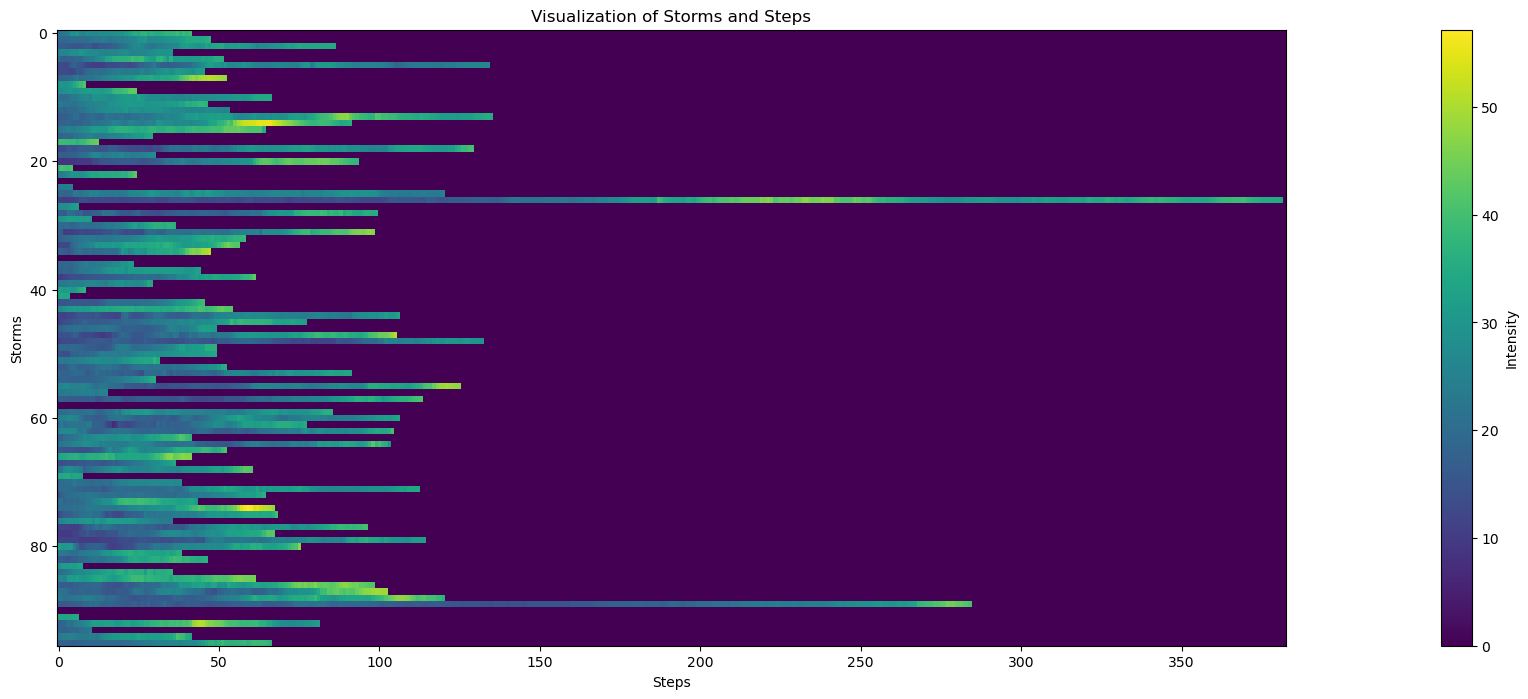

In [30]:
import matplotlib.pyplot as plt
import numpy as np

y_all_3d_mean = y_all_3d[:,:,0]
selected_data = [y_all_3d_mean[i, :last_step[i]] for i in range(len(last_step))]

# transform the selected data into a 2D array
selected_data_array =np.zeros((len(selected_data), max(last_step)+1))
for i in range(len(selected_data)):
    selected_data_array[i, :last_step[i]] = selected_data[i]



# plot the wind speed

plt.figure(figsize=(40, 8))
plt.imshow(selected_data_array, aspect=2, cmap='viridis')  # Use 'aspect="auto"' to adjust the display
plt.colorbar(label='Intensity')  # Add a colorbar to interpret values
plt.title('Visualization of Storms and Steps')
plt.xlabel('Steps')
plt.ylabel('Storms')
plt.show()

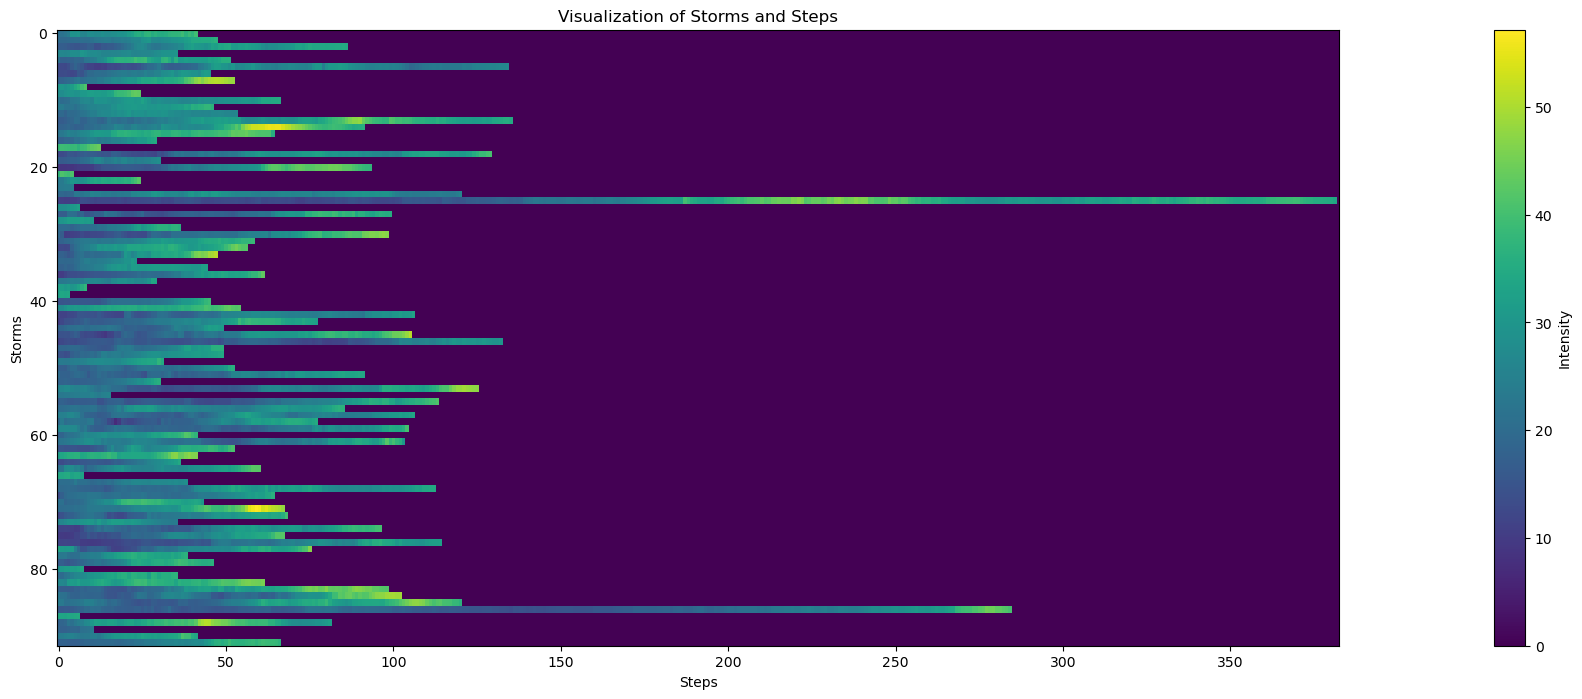

In [54]:
# remove the storms with 0 steps

selected_data_array_no_0 = selected_data_array[selected_data_array[:, 0] != 0]
last_step_no_0 = [step for step in last_step if step != 0]
selected_data_array_no_0 = pd.DataFrame(selected_data_array_no_0)

# plot the wind speed

plt.figure(figsize=(40, 8))
plt.imshow(selected_data_array_no_0, aspect=2, cmap='viridis')  # Use 'aspect="auto"' to adjust the display
plt.colorbar(label='Intensity')  # Add a colorbar to interpret values
plt.title('Visualization of Storms and Steps')
plt.xlabel('Steps')
plt.ylabel('Storms')
plt.show()

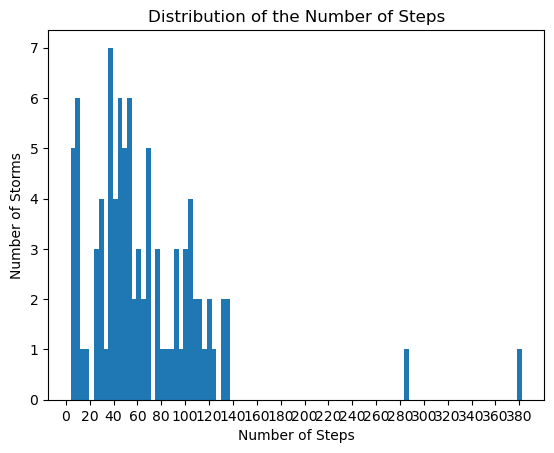

In [45]:
# see the distribution of the number of steps

plt.hist(last_step_no_0, bins=96)
plt.xlabel('Number of Steps')
plt.xticks(np.arange(0, 400, 20))
plt.ylabel('Number of Storms')
plt.title('Distribution of the Number of Steps')
plt.show()

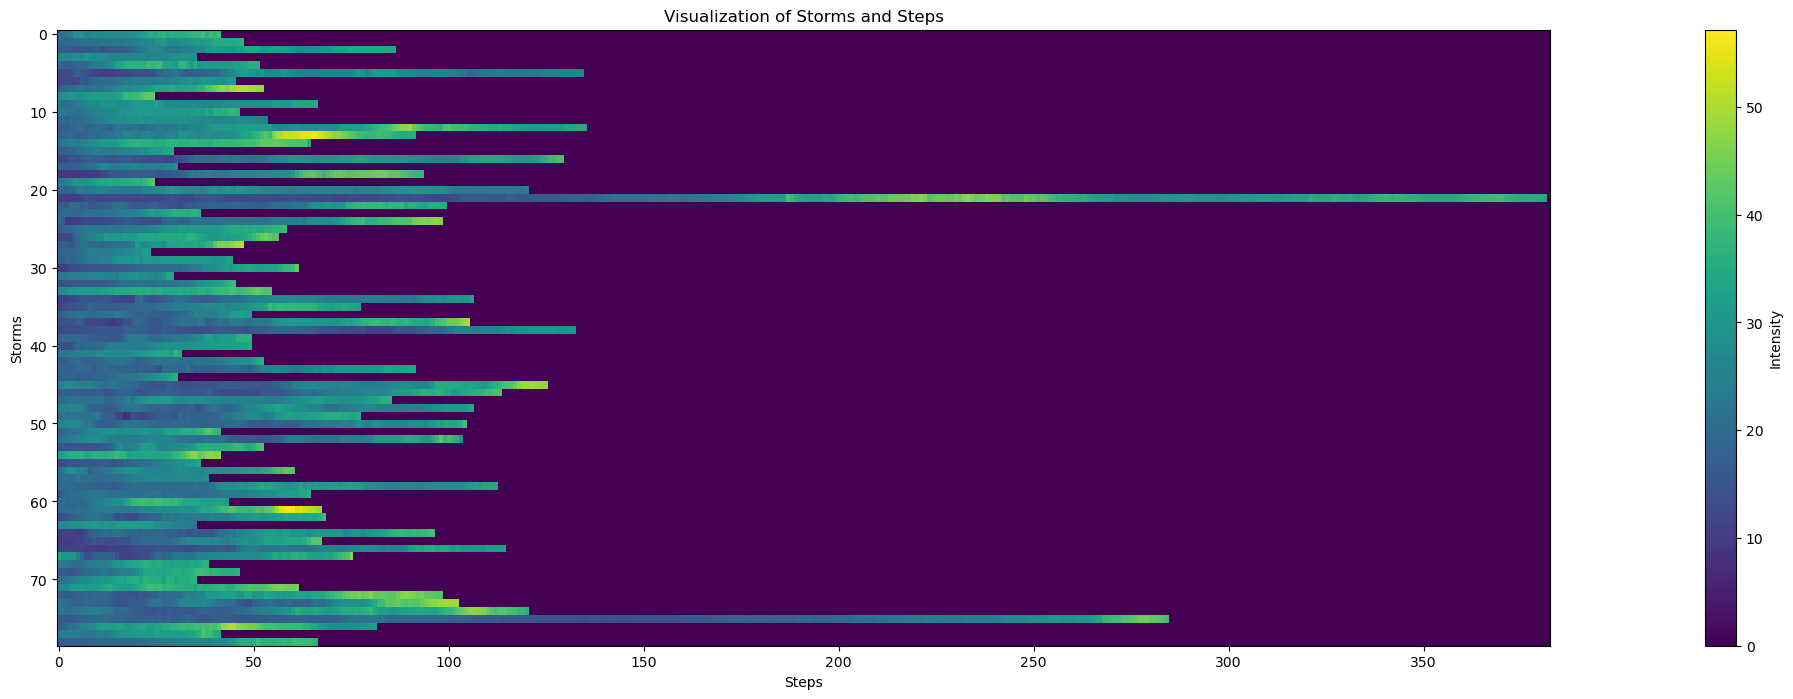

In [61]:
# remove storms with less than 20 steps

#selected_data_array_no_0_no_20 = selected_data_array_no_0[selected_data_array_no_0[:, 0] > 20]
#selected_data_array_no_0_no_20 = pd.DataFrame(selected_data_array_no_0_no_20)
last_step_no_0 = pd.Series(last_step_no_0)
last_step_no_0_no_20_true_false = last_step_no_0 > 20
last_step_no_0_no_20 = last_step_no_0[last_step_no_0 > 20]

selected_data_array_no_0_no_20 = selected_data_array_no_0[last_step_no_0_no_20_true_false]

# plot the wind speed

plt.figure(figsize=(40, 8))
plt.imshow(selected_data_array_no_0_no_20, aspect=2, cmap='viridis')  # Use 'aspect="auto"' to adjust the display
plt.colorbar(label='Intensity')  # Add a colorbar to interpret values
plt.title('Visualization of Storms and Steps')
plt.xlabel('Steps')
plt.ylabel('Storms')
plt.show()

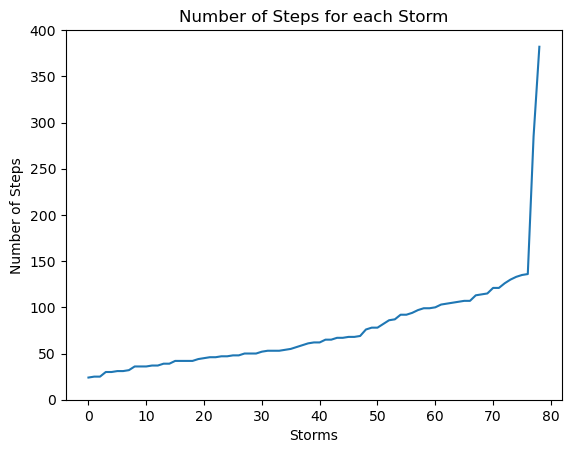

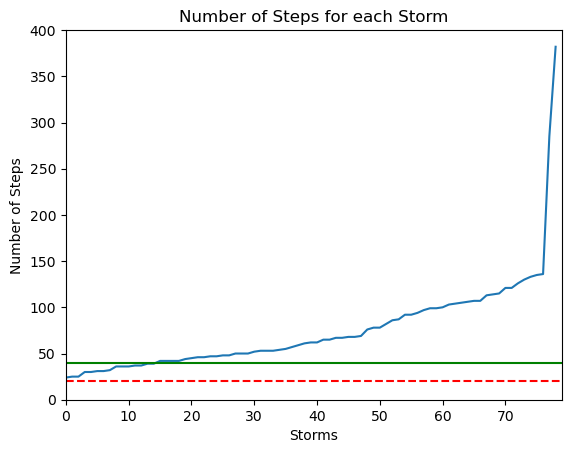

In [ ]:
# class the storms by number of steps / rows

#selected_data_array_no_0_no_20_sorted = selected_data_array_no_0_no_20[np.argsort(last_step_no_0_no_20),:]
last_step_no_0_no_20_sorted = np.sort(last_step_no_0_no_20)

# plot the wind speed

'''plt.figure(figsize=(40, 8))
plt.imshow(selected_data_array_no_0_no_20_sorted, aspect=2, cmap='viridis')  # Use 'aspect="auto"' to adjust the display
plt.colorbar(label='Intensity')  # Add a colorbar to interpret values
plt.title('Visualization of Storms and Steps')
plt.xlabel('Steps')
plt.ylabel('Storms')
plt.show()'''

# plot the last step of each storm in function of the storm number

plt.plot(last_step_no_0_no_20_sorted)
plt.xlabel('Storms')
plt.ylabel('Number of Steps')
plt.ylim(0, 400)
plt.title('Number of Steps for each Storm')
plt.show()

# draw a line at 20 steps

plt.plot(last_step_no_0_no_20_sorted)
plt.axhline(y=20, color='r', linestyle='--')
plt.axhline(y=40, color='g', linestyle='-')
plt.xlabel('Storms')
plt.ylabel('Number of Steps')
plt.ylim(0, 400)
plt.xlim(0, 79)
plt.title('Number of Steps for each Storm')
plt.show()

In [84]:
# take the last 40 steps of each storm in selected_data_array_no_0_no_20 that are not 0

selected_data_array_no_0_no_20 = pd.DataFrame(selected_data_array_no_0_no_20)

# replace the 0 values by NaN
selected_data_array_no_0_no_20 = selected_data_array_no_0_no_20.replace(0, np.nan)

# select the last 40 steps of each storm
selected_data_array_no_0_no_20_40_lasts = selected_data_array_no_0_no_20.iloc[:, -40:]

# Example: Apply filtering for multiple columns
filtered_df = pd.DataFrame()
for row in selected_data_array_no_0_no_20.iterrows():
    # take the values that are not nan
    row = row[1][row[1].notna()]
    # take the last 40 values
    row = row[-40:]
    # reset the index
    row = row.reset_index(drop=True)
    # add the row to the new dataframe
    try:
        filtered_df = pd.concat([filtered_df, row], axis=1)
    except:
        print('error')#filtered_df = row
#filtered_df = selected_data_array_no_0_no_20.apply(lambda col: col[col != 0].tail(40), axis=0)

# remove the columns with less than 40 values or contains nan
for col in filtered_df.columns:
    if filtered_df[col].isna().any():
        filtered_df.drop(col, axis=1, inplace=True)

#selected_data_array_no_0_no_20_40_lasts = selected_data_array_no_0_no_20[:, -40:]

# reshape the data to have the storms in rows and the steps in columns
filtered_df = filtered_df.T

# save it as a csv file
filtered_df.to_csv('data/data_before_eu_landfall_40.csv', index=False)

